In [2]:
import plotly
from plotly.graph_objs import Bar, Line
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import datasets as ds
import cv2  
#import cv
from PIL import Image

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
# Any results you write to the current directory are saved as output.
import sys

sys.path

sys.executable

'C:\\Users\\sulem\\Anaconda3\\python.exe'

In [393]:
#im = cv2.LoadImage("C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset")
infilename="C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset/0"

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( outfilename )

Working with 3000 images
Image examples: 
H1034.jpg


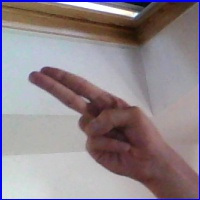

H1035.jpg


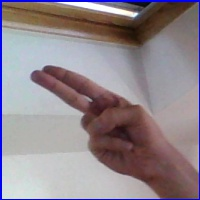

In [718]:
folder ="C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset/asl_alphabet_train/H"
#d = 1
#d=str(d)
#folder=folder+"/"+ d
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [830]:
from scipy import ndimage
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
num_of_img=250
n_components = 500
x_flat = np.zeros((num_of_img*29,40000))
x_g= np.zeros((200,200))
files=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']

i=0
for d in range(0,28):
 folder ="C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset/asl_alphabet_train"

 folder=folder+"/"+files[d]
 #onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
 onlyfiles = os.listdir(folder)

 train_files = []
 y_train = []

 f_n=0
 for _file in onlyfiles:
    train_files.append(_file)
    f_n += 1
    if f_n>num_of_img:
        break
#    label_in_file = _file.find("_")
#    y_train.append(int(_file[label_in_file+1:-4]))
    
 print("Files in train_files: %d" % len(train_files))
 
 # Original Dimensions
 image_width = 400
 image_height = 400
 ratio = 2

 image_width = int(image_width / ratio)
 image_height = int(image_height / ratio)

 channels =3
 nb_classes = 1

 dataset = np.ndarray(shape=(len(train_files),image_height, image_width,channels,),
                     dtype=np.float32)
 
 for _file in train_files:
    img = load_img(folder + "/"+ _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    #img = img.convert('LA')
    x = img_to_array(img) 
    for k in range(0, 199):
     x_g[k]=((x[k][:,0])*0.299)+((x[k][:,1])*0.587)+((x[k][:,2])*0.114 )
    x_flat[i]=x_g.ravel()
    # Normalize
    #x = (x - 128.0) / 128.0
   # dataset[i] = x
    i += 1
    if i % len(train_files) == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 251
251 images to array
Files in train_files: 251
502 images to array
Files in train_files: 251
753 images to array
Files in train_files: 251
1004 images to array
Files in train_files: 251
1255 images to array
Files in train_files: 251
1506 images to array
Files in train_files: 251
1757 images to array
Files in train_files: 251
2008 images to array
Files in train_files: 251
2259 images to array
Files in train_files: 251
2510 images to array
Files in train_files: 251
2761 images to array
Files in train_files: 251
3012 images to array
Files in train_files: 251
3263 images to array
Files in train_files: 251
3514 images to array
Files in train_files: 251
3765 images to array
Files in train_files: 251
4016 images to array
Files in train_files: 251
4267 images to array
Files in train_files: 251
4518 images to array
Files in train_files: 251
4769 images to array
Files in train_files: 251
5020 images to array
Files in train_files: 251
5271 images to array
Files in train_f

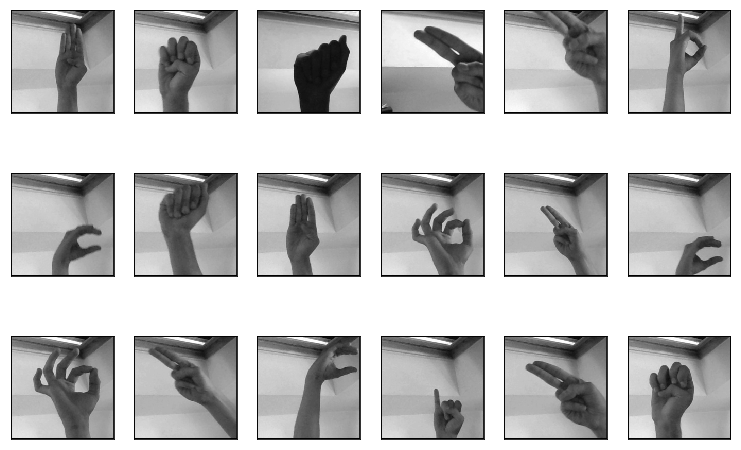

In [831]:
def plot_gallery(images,rnd, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[np.random.randint(rnd)].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_gallery(x_flat,2062, 200, 200) # defaults to showing a 3 by 6 subset of the faces

In [832]:
from sklearn.decomposition import PCA


print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, x_flat.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(x_flat.copy())
eigenfingers = pca.components_.reshape((n_components, 200, 200))


Extracting the top 500 eigenfaces from 7250 faces
Wall time: 6min 15s


In [834]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

In [835]:
plot_explained_variance(pca)

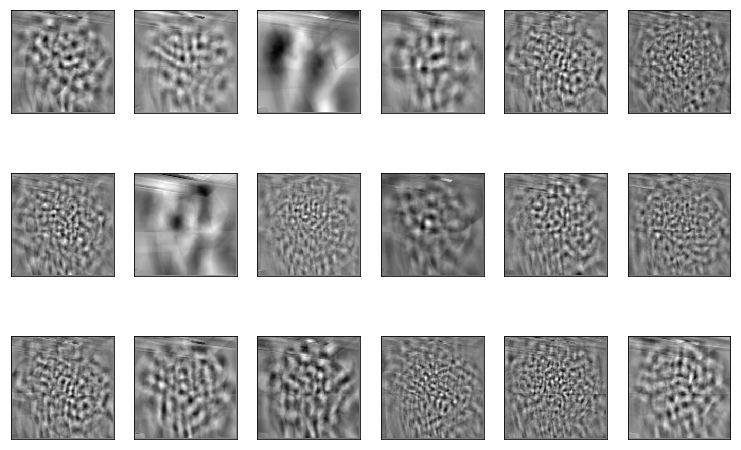

In [837]:
eigenfingers.shape
plot_gallery(eigenfingers,n_components, 200, 200)

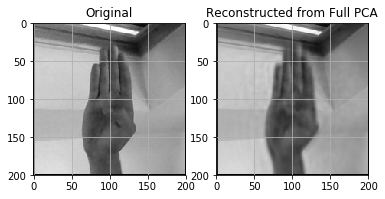

In [839]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = np.random.randint(1000)   
X_idx = x_flat[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))


plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((200, 200)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((200, 200)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid()

In [841]:
from sklearn.decomposition import PCA


print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, x_flat.shape[0]))

rpca = PCA(n_components=n_components,svd_solver='randomized')
%time rpca.fit(x_flat.copy())
eigenfingers = rpca.components_.reshape((n_components, 200, 200))

Extracting the top 500 eigenfaces from 7250 faces
Wall time: 2min 39s


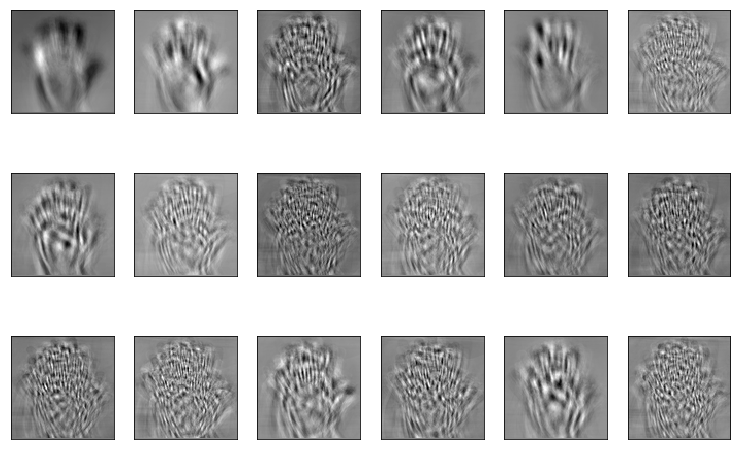

In [579]:
plot_gallery(eigenfingers, 500, 200,200)

In [843]:
%%time
#  THIS  TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA

n_components = 500
print ("Extracting the top %d eigenfaces from %d faces, ALSO getting inverse transform" % (n_components,x_flat.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(x_flat)

Extracting the top 500 eigenfaces from 7250 faces, ALSO getting inverse transform
Wall time: 5min 34s
Parser   : 146 ms


In [849]:
import warnings
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)

h=200
w=200

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(x_flat[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)

    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Randomized PCA')
    plt.grid()
    
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,(num_of_img*29)-1,1),__manual=True)

interactive(children=(IntSlider(value=3624, description='idx_to_reconstruct', max=7249), Output()), _dom_class…

<function __main__.plt_reconstruct(idx_to_reconstruct)>

In [847]:
num_of_img*29*40000

290000000